#### Problem
Let $X_1,\,\dots,\,X_n \sim \text{Bernoulli}(p)$.
Let $\alpha > 0$ and define
$$
    \varepsilon_n = \sqrt{\frac{1}{2n} \log \left( \frac{2}{\alpha} \right)}.
$$

Let $\hat{p}_n = \frac{1}{n} \sum_{i=1}^n X_i$ and
define $C_n = \left( \hat{p}_n - \varepsilon_n,\, \hat{p}_n + \varepsilon_n \right)$.
We call $C_n$ a *confidence interval for $p$* since Hoeffding's inequality tells us that

$$
    \mathbb{P} \left( \text{$C_n$ contains $p$} \right) \geqslant 1 - \alpha.
$$

Let $\alpha = 0.05$ and $p = 0.4$.
Conduct a simulation study to see how often the interval contains $p$ (called the coverage).
Do this for various values of $n$ between $1$ and $10^5$.
Plot the coverage versus $n$.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import bernoulli

In [34]:
def is_in_confidence_interval(p_hat, p, alpha, n):
    epsilon_n = np.sqrt(np.log(2/alpha)/(2*n))
    return np.abs(p_hat - p) < epsilon_n

def empirical_coverage(p, alpha, trials, n):
    X = bernoulli.rvs(p=p, size=n*trials).reshape([trials, n])
    p_hat = np.mean(X, axis=1)
    return sum(is_in_confidence_interval(p_hat_i, p, alpha, n) for p_hat_i in p_hat) / trials

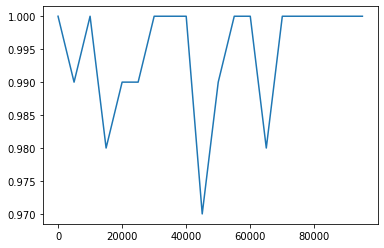

In [44]:
n_list = np.arange(1, int(1e5), int(5e3))

empirical_coverage_list = [
    empirical_coverage(p=0.4, alpha=0.05, trials=100, n=n)
    for n in n_list
]

plt.plot(n_list, empirical_coverage_list)
plt.show()

##### Conclusion:
The coverage is higher than the theoretically guaranteed coverage (of $0.95$ when $\alpha=0.05$).